### EDA for Denver ###

- For Frame of Reference:
| Year   |      Start of DST      |  End of DST |
|----------|:-------------:|------:|
| 2016 | March 13 | November 6 |
| 2017 | March 12 | November 5 |
| 2018 | March 11 | November 4 |
| 2019 | March 10 | November 3 |
| 2020 | March 8 | November 2 |

source: https://en.wikipedia.org/wiki/Main_Page

**Imports**

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
import seaborn as sns
sns.set(style = "darkgrid")

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import datetime as dt

np.random.seed(42)

### Reading In Data ###

In [2]:
#original data:
dia_df_og = pd.read_csv('../data/dia_accidents.csv')

In [3]:
dia_df_og.head(3)

id  severity           start_time             end_time  start_lat  \
0  A-2728727         4  2016-11-30 14:02:43  2016-11-30 20:02:43  38.897000   
1  A-2728732         3  2016-11-30 15:09:40  2016-11-30 21:09:40  39.629510   
2  A-2728734         2  2016-11-30 15:27:44  2016-11-30 21:27:44  38.936713   

    start_lng    end_lat     end_lng  distance(mi)  \
0 -104.747070  38.897050 -104.747869         0.043   
1 -104.904710  39.637640 -104.909150         0.609   
2 -104.797781  38.938301 -104.798323         0.114   

                                         description  number           street  \
0  Closed at Austin Bluffs Pky - Road closed due ...  4302.0        Barnes Rd   
1                               At I-225 - Accident.     NaN          US-87 N   
2                          At Shrider Rd - Accident.  7279.0   N Academy Blvd   

  side              city   county state     zipcode country     timezone  \
0    L  Colorado Springs  El Paso    CO  80917-1559      US  US/Mountain   
1    R            Denver   Denver    CO       80237      US  US/Mountain   
2    R  Colorado Springs  El Paso    CO  80920-3188      US  US/Mountain   

  airport_code    weather_timestamp  temperature(f)  wind_chill(f)  \
0         KCOS  2016-11-30 13:54:00            37.9           32.7   
1         KAPA  2016-11-30 14:53:00            37.9           30.5   
2         KAFF  2016-11-30 14:58:00            37.8           31.3   

   humidity(%)  pressure(in)  visibility(mi) wind_direction  wind_speed(mph)  \
0         18.0         29.94            10.0             SE              6.9   
1         19.0         29.94            10.0          North             11.5   
2         16.0         29.95            10.0          South              9.2   

   precipitation(in) weather_condition  amenity   bump  crossing  give_way  \
0                NaN     Partly Cloudy    False  False      True     False   
1                NaN     Partly Cloudy    False  False     False     False   
2                NaN             Clear    False  False     False     False   

   junction  no_exit  railway  roundabout  station   stop  traffic_calming  \
0     False    False    False       False    False  False            False   
1     False    False    False       False    False  False            False   
2     False    False    False       False    False  False            False   

   traffic_signal  turning_loop sunrise_sunset civil_twilight  \
0           False         False            Day            Day   
1           False         False            Day            Day   
2            True         False            Day            Day   

  nautical_twilight astronomical_twilight  
0               Day                   Day  
1               Day                   Day  
2               Day                   Day

In [4]:
dia_df_og.shape

(16555, 47)

In [5]:
dia_df_og.columns

Index(['id', 'severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'description', 'number', 'street',
       'side', 'city', 'county', 'state', 'zipcode', 'country', 'timezone',
       'airport_code', 'weather_timestamp', 'temperature(f)', 'wind_chill(f)',
       'humidity(%)', 'pressure(in)', 'visibility(mi)', 'wind_direction',
       'wind_speed(mph)', 'precipitation(in)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'turning_loop', 'sunrise_sunset', 'civil_twilight', 'nautical_twilight',
       'astronomical_twilight'],
      dtype='object')

In [6]:
#cleaned data:
dia_df = pd.read_csv('../data/dia_df_cleaned.csv')

In [7]:
dia_df.head(3)

severity  start_lat   start_lng    end_lat     end_lng  distance(mi)  \
0         4  38.897000 -104.747070  38.897050 -104.747869         0.043   
1         3  39.629510 -104.904710  39.637640 -104.909150         0.609   
2         2  38.936713 -104.797781  38.938301 -104.798323         0.114   

   temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  visibility(mi)  \
0            37.9           32.7         18.0         29.94            10.0   
1            37.9           30.5         19.0         29.94            10.0   
2            37.8           31.3         16.0         29.95            10.0   

   wind_speed(mph)  precipitation(in)  amenity  bump  crossing  give_way  \
0              6.9                0.0        0     0         1         0   
1             11.5                0.0        0     0         0         0   
2              9.2                0.0        0     0         0         0   

   junction  no_exit  railway  roundabout  station  stop  traffic_calming  \
0         0        0        0           0        0     0                0   
1         0        0        0           0        0     0                0   
2         0        0        0           0        0     0                0   

   traffic_signal  turning_loop  start_time_ep   end_time_ep  \
0               0             0   1.480515e+09  1.480536e+09   
1               0             0   1.480519e+09  1.480540e+09   
2               1             0   1.480520e+09  1.480541e+09   

   weather_timestamp_ep  year  month  week  accident_duration  side_L  side_R  \
0          1.480514e+09  2016     11    48            21600.0       1       0   
1          1.480518e+09  2016     11    48            21600.0       0       1   
2          1.480518e+09  2016     11    48            21600.0       0       1   

   wind_direction_CALM  wind_direction_E  wind_direction_ENE  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   

   wind_direction_ESE  wind_direction_N  wind_direction_NE  \
0                   0                 0                  0   
1                   0                 1                  0   
2                   0                 0                  0   

   wind_direction_NNE  wind_direction_NNW  wind_direction_NW  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   0                  0   

   wind_direction_S  wind_direction_SE  wind_direction_SSE  \
0                 0                  1                   0   
1                 0                  0                   0   
2                 1                  0                   0   

   wind_direction_SSW  wind_direction_SW  wind_direction_VAR  \
0                   0                  0                   0   
1                   0                  0                   0   
2                   0                  0                   0   

   wind_direction_W  wind_direction_WNW  wind_direction_WSW  \
0                 0                   0                   0   
1                 0                   0                   0   
2                 0                   0                   0   

   weather_condition_Blowing Dust / Windy  weather_condition_Clear  \
0                                       0                        0   
1                                       0                        0   
2                                       0                        1   

   weather_condition_Cloudy  weather_condition_Fog  \
0                         0                      0   
1                         0                      0   
2                         0                      0   

   weather_condition_Haze / Windy  weather_condition_Heavy Blowing Snow  \
0                               0                                     0   
1                  

In [8]:
dia_df.shape

(15382, 126)

In [9]:
dia_df.columns[:35]

Index(['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'distance(mi)', 'temperature(f)', 'wind_chill(f)', 'humidity(%)',
       'pressure(in)', 'visibility(mi)', 'wind_speed(mph)',
       'precipitation(in)', 'amenity', 'bump', 'crossing', 'give_way',
       'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop',
       'traffic_calming', 'traffic_signal', 'turning_loop', 'start_time_ep',
       'end_time_ep', 'weather_timestamp_ep', 'year', 'month', 'week',
       'accident_duration', 'side_L', 'side_R'],
      dtype='object')

### EDA ###

**Visualizations of Original Data**

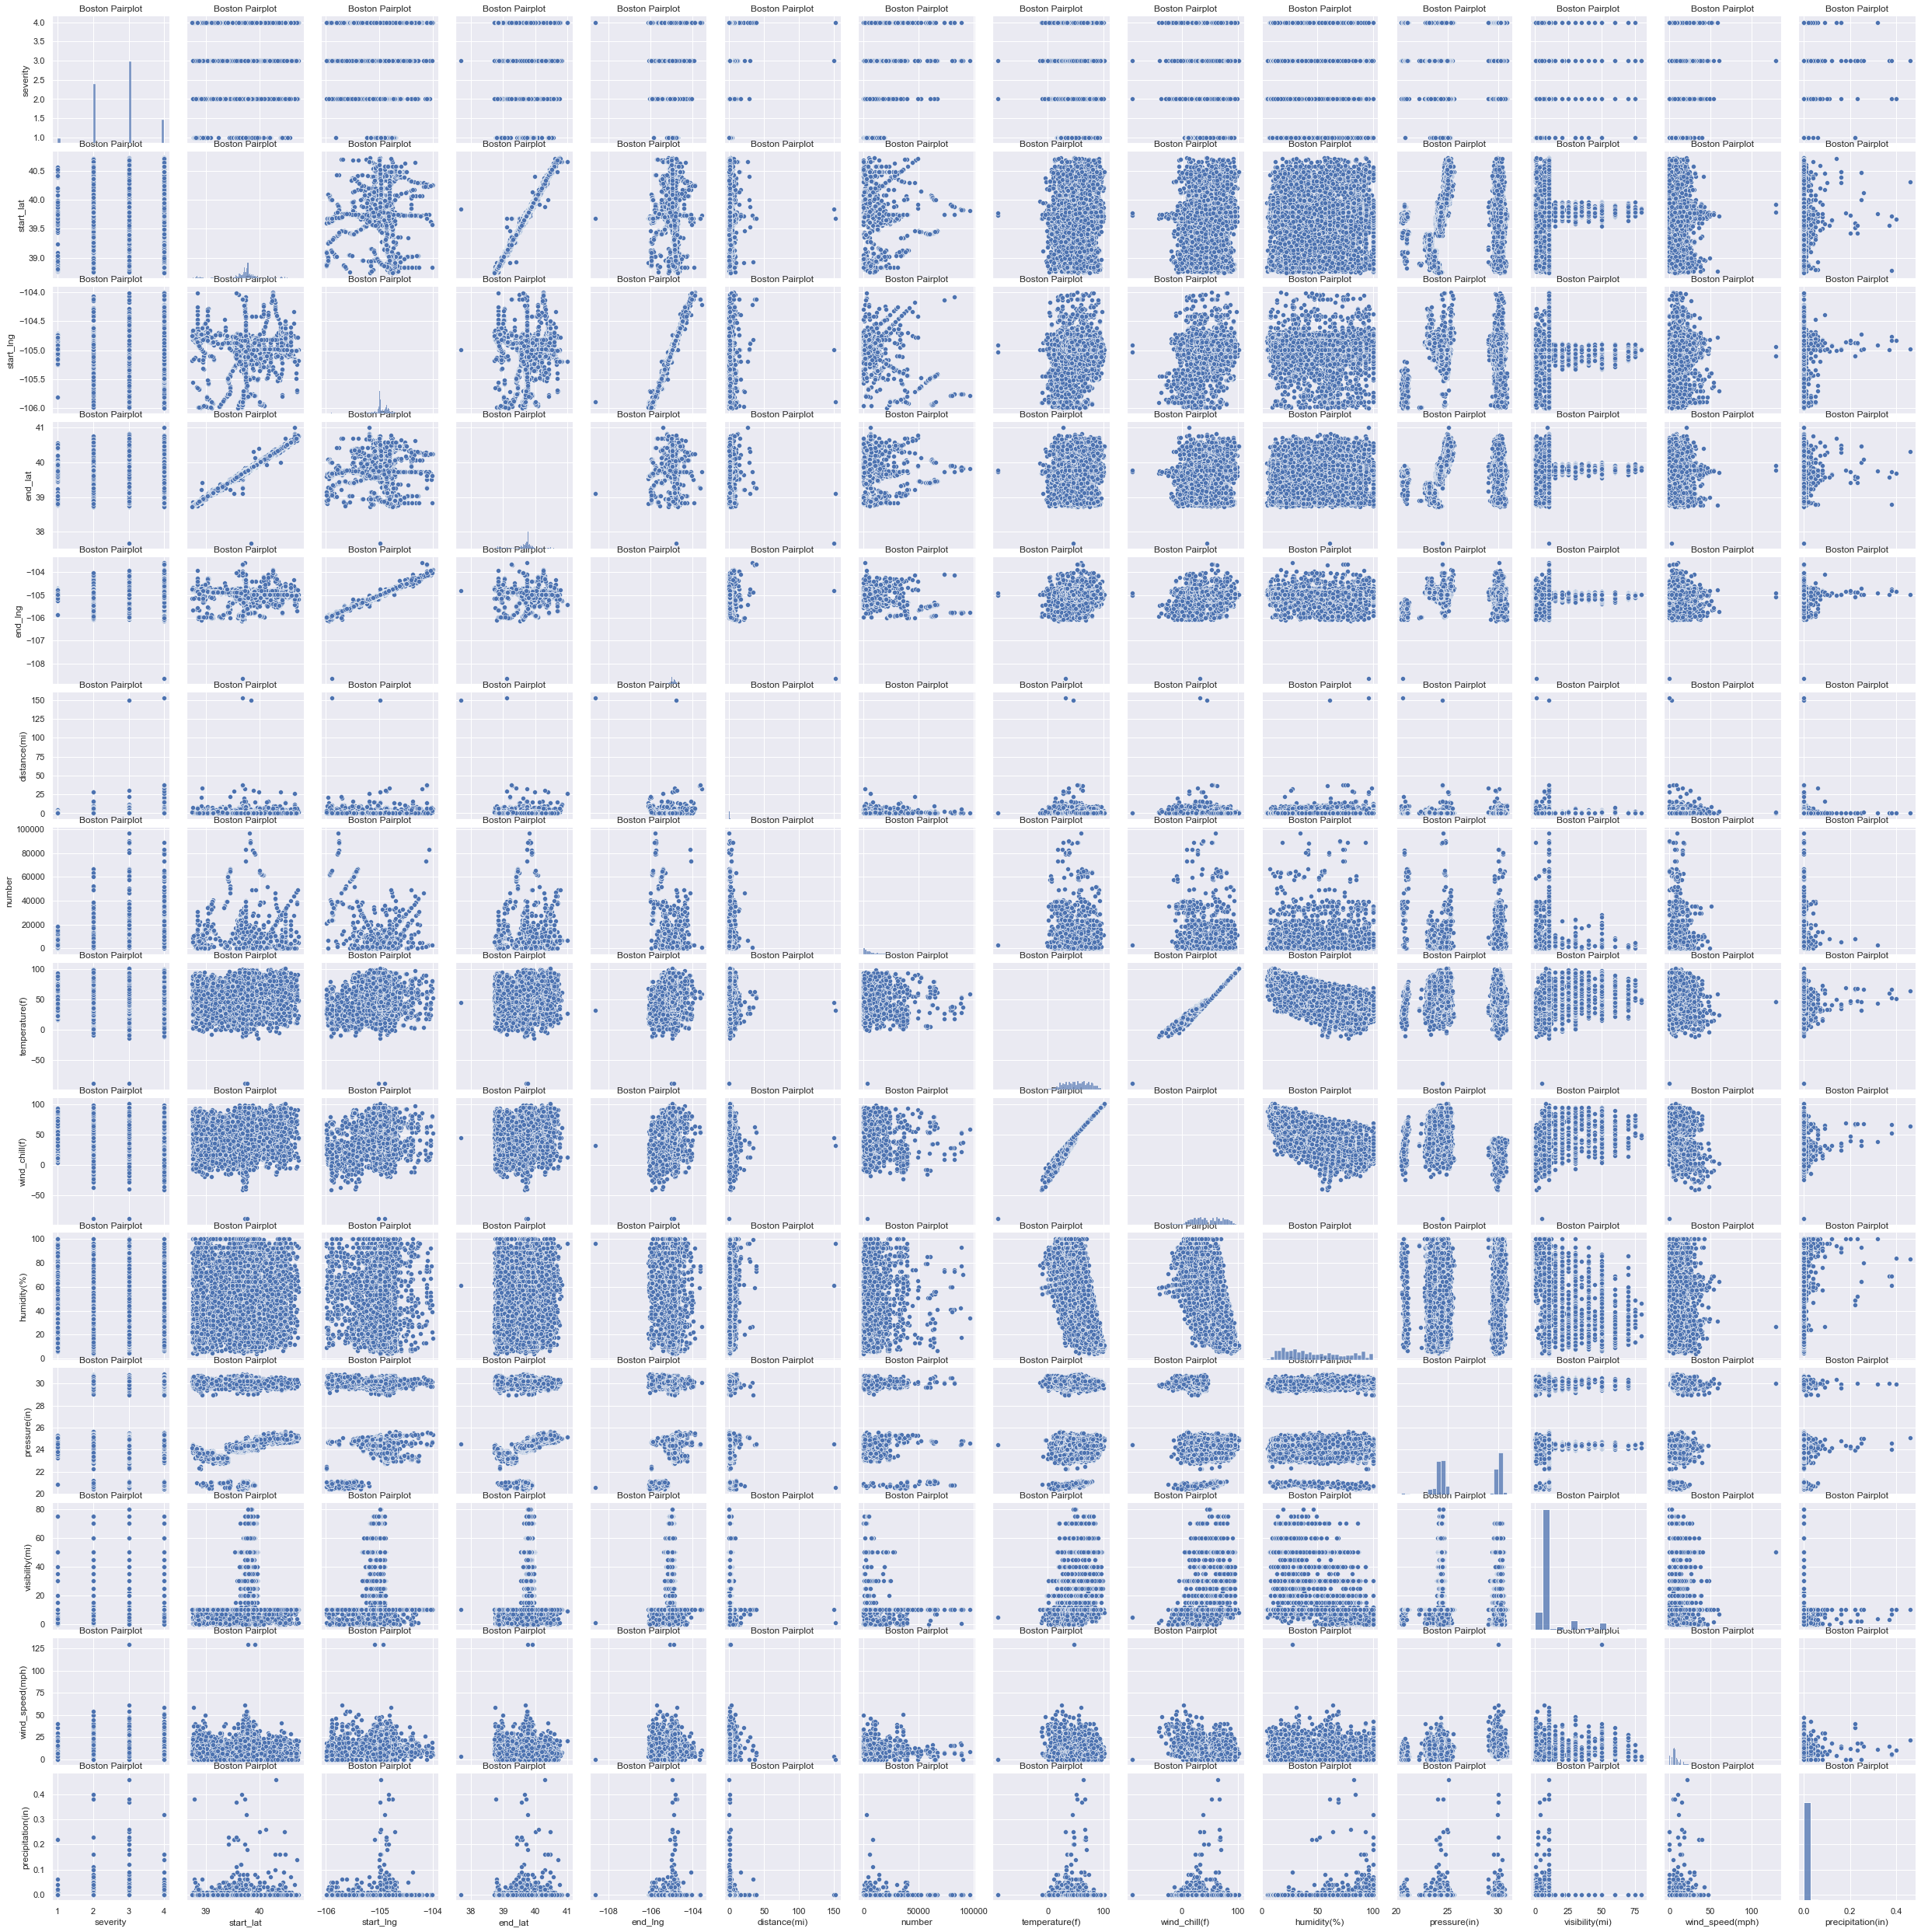

In [10]:
#pairplot for Denver
sns.pairplot(dia_df_og[['severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'number', 'weather_timestamp',
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)']]).set(title = 'Boston Pairplot');

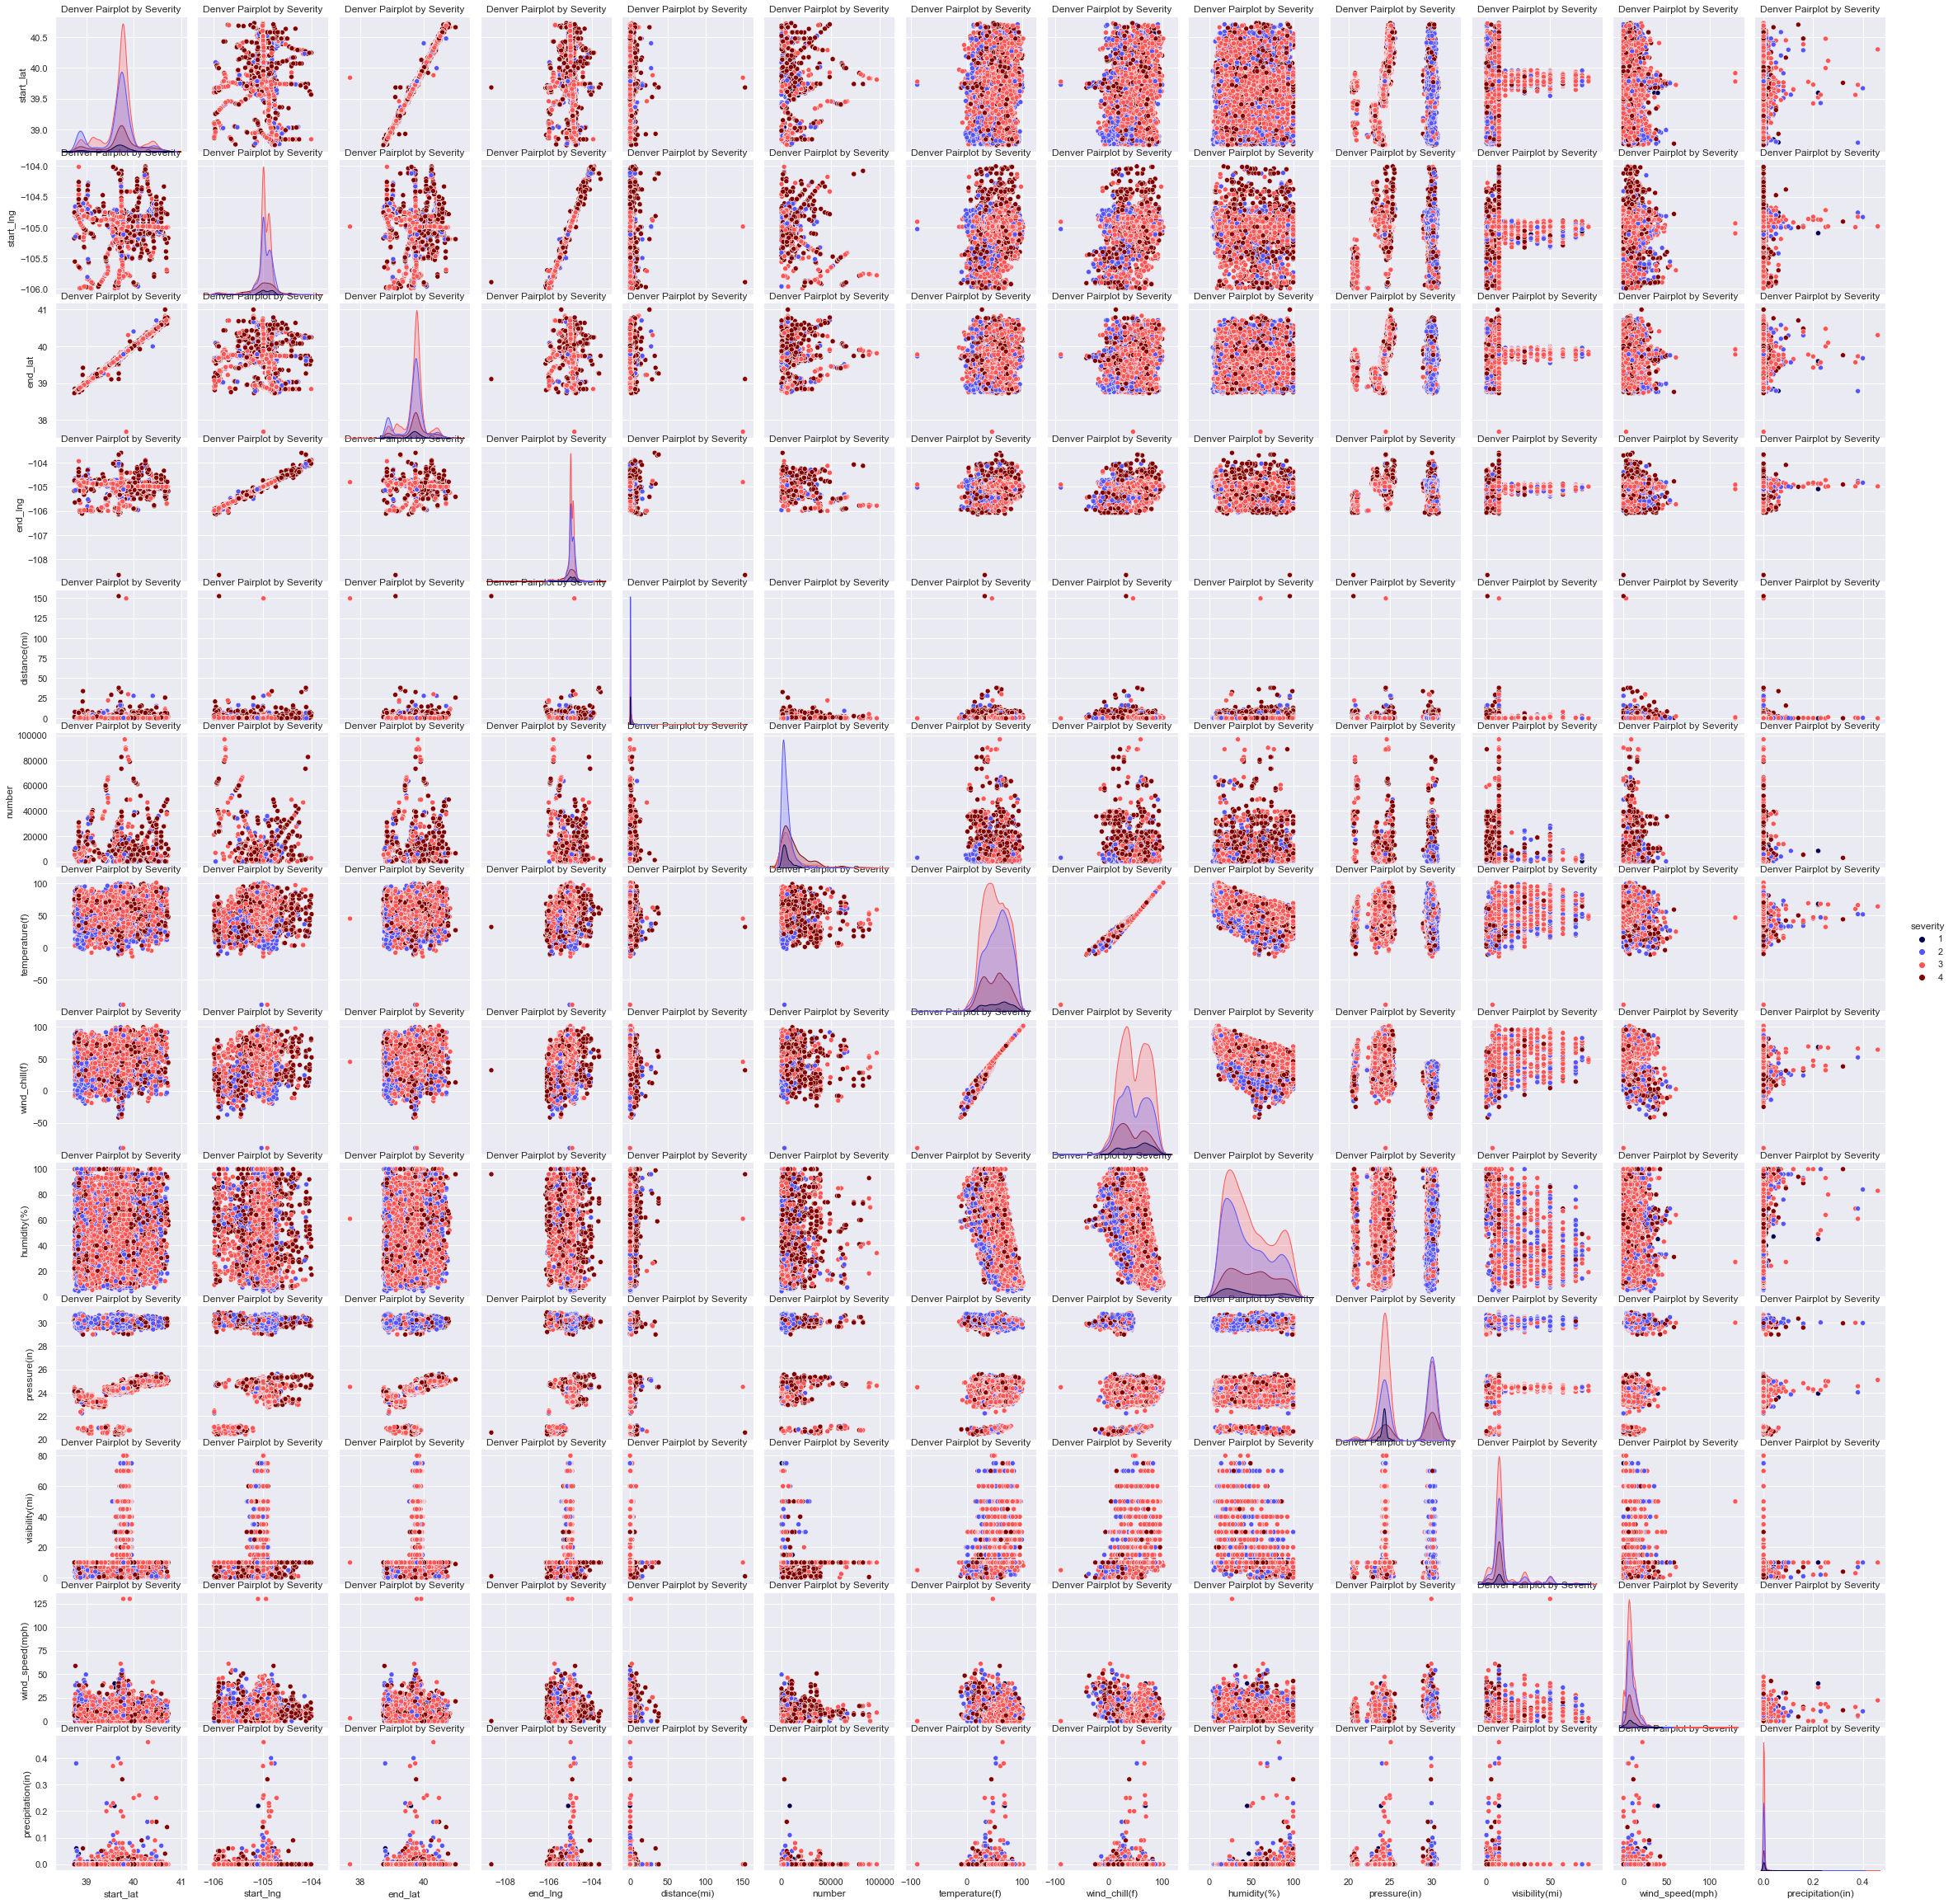

In [11]:
#pairplot for Denver, hued by Severity
sns.pairplot(dia_df_og[['severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'number', 'weather_timestamp',
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)']], hue = 'severity', palette = 'seismic').set(title= 'Denver Pairplot by Severity');

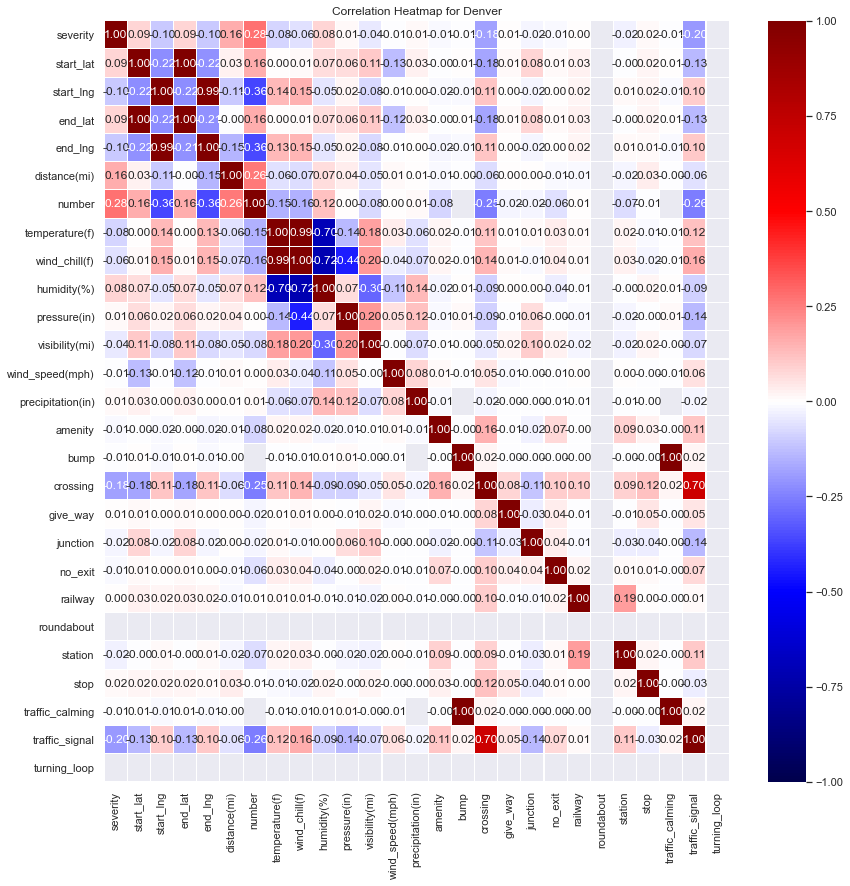

In [12]:
#corr heatmap for Denver
plt.figure(figsize = (14, 14))
sns.heatmap(dia_df_og.corr(),
            annot = True,
            fmt = '.2f',
            linewidth = .1,
            vmin = -1,
            vmax = 1,
            cmap = 'seismic')
plt.title('Correlation Heatmap for Denver');

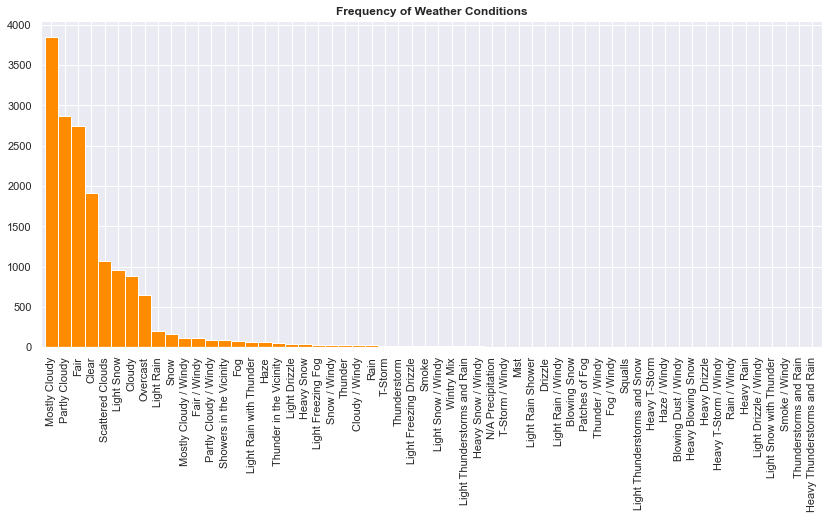

In [13]:
#bar plot of weather conditions for Denver
dia_df_og['weather_condition'].value_counts().plot(kind = 'bar',
                                                   figsize=(14, 6),
                                                   width = 1,
                                                   color = 'darkorange')
plt.title('Frequency of Weather Conditions', fontweight = "bold");

In [14]:
#renaming certain wind_direction values
dia_df_og['wind_direction'].replace({
        'North': 'N',
        'South': 'S',
        'West' : 'W',
        'East' : 'E',
        'Calm' : 'CALM',
        'Variable': 'VAR'
    }, inplace = True)

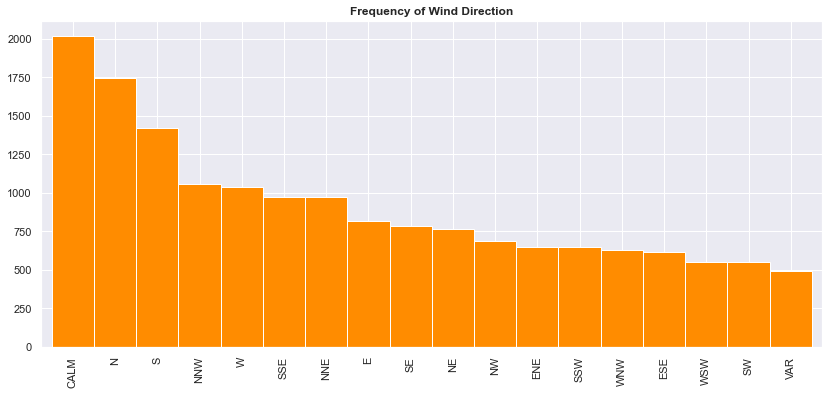

In [15]:
#bar plot of wind_direction for Denver
dia_df_og['wind_direction'].value_counts().plot(kind = 'bar',
                                                   figsize=(14, 6),
                                                   width = 1,
                                                   color = 'darkorange')
plt.title('Frequency of Wind Direction', fontweight = "bold");

In [16]:
#taking note of earlist available value
dia_df_og['start_time'].sort_values()

1150              2016-06-21 08:41:51
721               2016-06-21 08:49:55
1151              2016-06-21 10:42:53
722               2016-06-21 14:59:03
723               2016-06-21 15:11:55
                    ...              
2443              2020-12-30 21:05:00
2147              2020-12-30 21:44:00
2235    2020-12-30 23:19:00.000000000
2552              2020-12-31 13:22:00
2336              2020-12-31 13:22:00
Name: start_time, Length: 16555, dtype: object

**Exploring Cleaned Data**

In [17]:
dia_df.shape

(15382, 126)

In [18]:
#descriptive statistics for Denver
dia_df[['severity', 'start_time_ep', 'end_time_ep', 'weather_timestamp_ep', 
        'start_lat', 'start_lng', 'end_lat', 'end_lng', 'distance(mi)', 
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)', 'accident_duration']].describe().apply(lambda s: s.apply('{0:.5f}'.format)).drop('count').T

mean             std               min  \
severity                       2.74093         0.72374           1.00000   
start_time_ep         1551800058.17963  36133916.24147  1466498511.00000   
end_time_ep           1551807934.45079  36126994.68458  1466520111.00000   
weather_timestamp_ep  1551800037.10961  36133935.18688  1466498820.00000   
start_lat                     39.68520         0.36346          38.74280   
start_lng                   -104.97389         0.19603        -105.99136   
end_lat                       39.68523         0.36410          37.68034   
end_lng                     -104.97390         0.20029        -108.64746   
distance(mi)                   0.58886         2.29376           0.00000   
temperature(f)                52.38073        21.21456         -89.00000   
wind_chill(f)                 49.86131        24.16187         -89.00000   
humidity(%)                   47.83906        26.66717           4.00000   
pressure(in)                  26.82292         2.97544          20.43000   
visibility(mi)                13.88193        12.52606           0.00000   
wind_speed(mph)                9.06437         6.15593           0.00000   
precipitation(in)              0.00092         0.01113           0.00000   
accident_duration           7876.27116     22620.66787         684.00000   

                                   25%               50%               75%  \
severity                       2.00000           3.00000           3.00000   
start_time_ep         1530618447.00000  1558374770.50000  1584694799.50000   
end_time_ep           1530640047.00000  1558376528.50000  1584697459.75000   
weather_timestamp_ep  1530618300.00000  1558372140.00000  1584694800.00000   
start_lat                     39.61790          39.74061          39.82552   
start_lng                   -105.01153        -104.98044        -104.87237   
end_lat                       39.61891          39.74242          39.82722   
end_lng                     -105.01137        -104.98039        -104.87203   
distance(mi)                   0.00000           0.18000           0.52800   
temperature(f)                35.60000          53.00000          69.80000   
wind_chill(f)                 30.70000          53.00000          69.80000   
humidity(%)                   25.00000          42.00000          69.00000   
pressure(in)                  24.29000          24.87000          30.03000   
visibility(mi)                10.00000          10.00000          10.00000   
wind_speed(mph)                5.80000           8.10000          11.50000   
precipitation(in)              0.00000           0.00000           0.00000   
accident_duration           1768.00000        1794.00000       21600.00000   

                                   max  
severity                       4.00000  
start_time_ep         1609420920.00000  
end_time_ep           1609426973.00000  
weather_timestamp_ep  1609419180.00000  
start_lat                     40.73108  
start_lng                   -104.00460  
end_lat                       40.99629  
end_lng                     -103.59349  
distance(mi)                 152.54300  
temperature(f)               101.00000  
wind_chill(f)                101.00000  
humidity(%)                  100.00000  
pressure(in)                  30.87000  
visibility(mi)                80.00000  
wind_speed(mph)              130.00000  
precipitation(in)              0.46000  
accident_duration        2385191.00000

In [19]:
#a normalized value_count of accident severity
dia_df['severity'].value_counts(normalize = True).sort_index()

1    0.028280
2    0.340138
3    0.493954
4    0.137628
Name: severity, dtype: float64

**Exploring the frequency of accidents**

In [20]:
#function to generate count plots
def make_countplot(dataframe,
                   x, y = None,
                   hue = None,
                   palette = None):
    
    return sns.countplot(data = dataframe,
                         x = x,
                         hue = hue,
                         palette = palette)

In [21]:
#Overall number of Accidents - Denver
make_countplot(dia_df, 'year', palette = 'seismic')
plt.title('Numbers of Accidents - Denver', fontweight = 'bold')
plt.show();

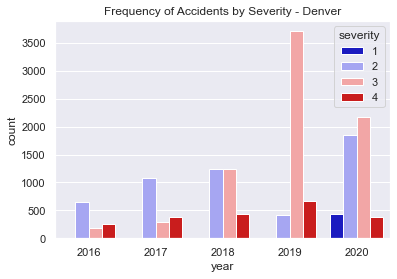

In [22]:
#Frequency of Accidents by Sev. for Denver
make_countplot(dia_df, x = 'year', hue = 'severity', palette = 'seismic')
plt.title('Frequency of Accidents by Severity - Denver')
plt.show();

#are '1' severity accidents under reported?
#remember severity is: a number between 1 and 4,
#where 1 indicates the least impact on traffic 
#(i.e., short delay as a result of the accident) and
#4 indicates a significant impact on traffic (i.e., long delay).	

In [23]:
#function to generate histplots
def make_histplot(dataframe,
                  x, y = None,
                  hue = None,
                  color = None,
                  palette = None,
                  kde = True):
    
    sns.histplot(data = dataframe,
                 x = x, y = y,
                 hue = hue,
                 color = color,
                 palette = palette,
                 kde = kde)
    
    plt.title('Frequency of Accidents by Week')
    return plt.show()

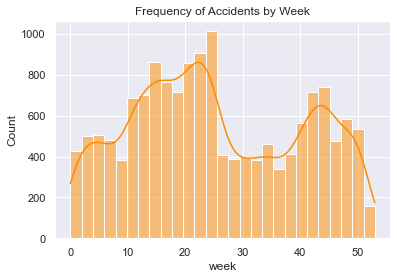

In [24]:
make_histplot(dia_df, x = 'week', color = 'darkorange')
#could the drop around weeks 27, 28 be attributed to the 4th of July holiday?

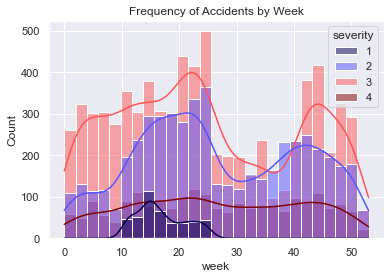

In [25]:
make_histplot(dia_df, x = 'week', hue = 'severity', palette = 'seismic')

In [26]:
#function to generate kdeplots
def make_kdeplot(dataframe,
                 shade = True,
                 color = None):
    
    return sns.kdeplot(data = dataframe,
                shade = shade,
                color = color);

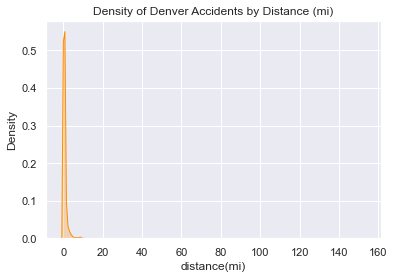

In [27]:
#kde plot for Denver's distance
make_kdeplot(dia_df['distance(mi)'], color = 'darkorange')

plt.title('Density of Denver Accidents by Distance (mi)')
plt.show()

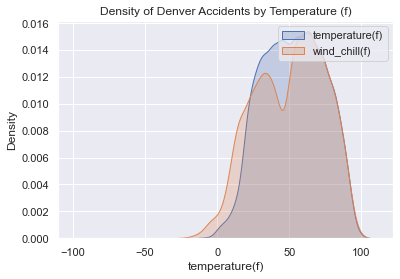

In [28]:
#Looking at weather variables for Denver
fig = make_kdeplot(dia_df['temperature(f)'], shade = True)
fig = make_kdeplot(dia_df['wind_chill(f)'], shade = True)
plt.title('Density of Denver Accidents by Temperature (f)')
plt.legend(labels = ['temperature(f)', 'wind_chill(f)'])
plt.show()

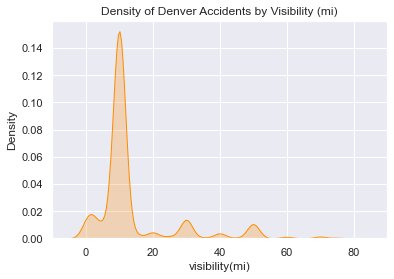

In [29]:
#kde plot for Denver's visbility distance
make_kdeplot(dia_df['visibility(mi)'], color = 'darkorange')
plt.title('Density of Denver Accidents by Visibility (mi)')
plt.show()

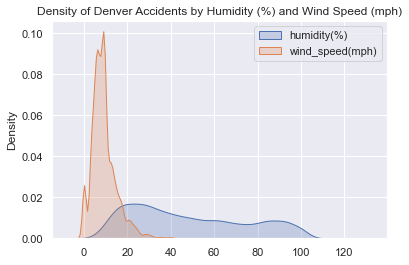

In [30]:
ax1 = plt.axes()
x_axis = ax1.xaxis
x_axis.set_label_text('foo')
x_axis.label.set_visible(False)

#combined kde plots for Denver's humidity(%), and wind_speed(mph)
fig = make_kdeplot(dia_df['humidity(%)'])
fig = make_kdeplot(dia_df['wind_speed(mph)'])
plt.title('Density of Denver Accidents by Humidity (%) and Wind Speed (mph)')
plt.legend(labels = ['humidity(%)', 'wind_speed(mph)'])
plt.show()

**Trying to Plot the 'Shape' of the Cities**

In [31]:
#function to generate jointplots
def make_jointplot(x, y,
                   kind = 'kde',
                   fill = True, 
                   color = None):
    
    return sns.jointplot(x = x, y = y,
                         kind = kind,
                         fill = fill,
                         color = color)

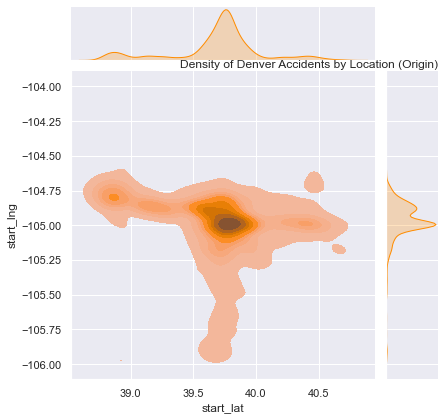

In [32]:
#Density of Denver's accidents
make_jointplot(x = dia_df["start_lat"], 
               y = dia_df["start_lng"], 
               kind ='kde', 
               fill = True, 
               color = 'darkorange')

plt.title('Density of Denver Accidents by Location (Origin)', y = .99, loc = 'right')
plt.yticks(rotation = 90)
plt.show()

In [33]:
#function to generate jointplots - hex kind
def make_jointplothex(x, y,
                   kind = 'hex',
                   color = None):
    
    return sns.jointplot(x = x, y = y,
                         kind = kind,
                         color = color)

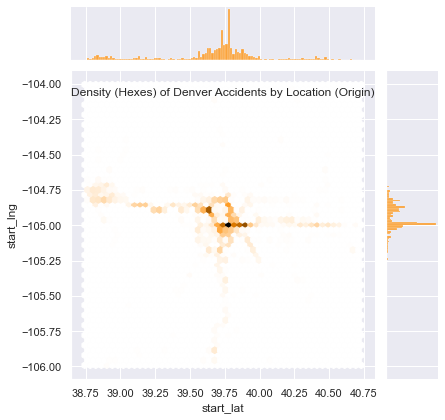

In [34]:
#Density of Denver's accidents - hexes
make_jointplothex(x = dia_df["start_lat"],
                  y = dia_df["start_lng"],
                  kind = 'hex', 
                  color = 'darkorange')

plt.title('Density (Hexes) of Denver Accidents by Location (Origin)', 
          y = 0.9)
plt.show();

In [35]:
#function to generate scatterplots
def make_scatterplot(x, y, s, alpha):
    #setting figure size
    plt.figure(figsize=(10, 10))
    
    #setting x and y labels
    plt.xlabel('Starting Latitude')
    plt.ylabel('Starting Longitude')
    
    #making plot
    return plt.scatter(x = x,
                       y = y,
                       s = s,
                       alpha = 0.5)

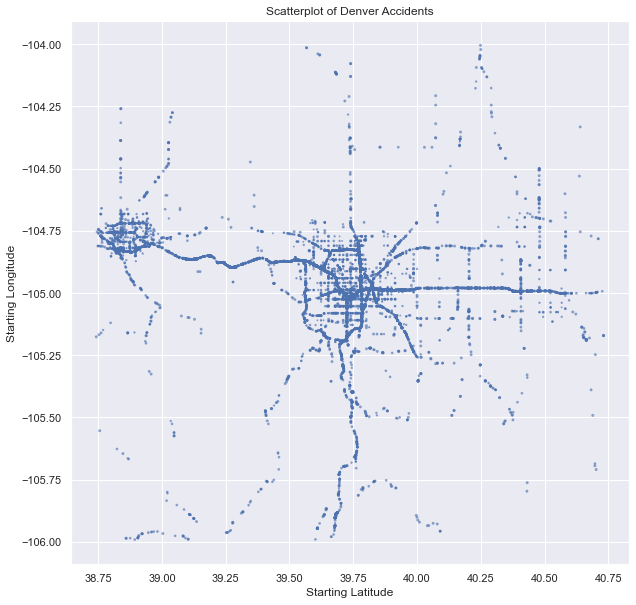

In [36]:
#scatterplot of Denver
make_scatterplot(x = dia_df['start_lat'],
                 y = dia_df['start_lng'],
                 s = dia_df['severity'],
                 alpha = 0.5)
plt.title('Scatterplot of Denver Accidents');

In [37]:
#function to generate hued scatterplots
def make_hued_scatterplot(x, y, c, s, cmap, alpha):
    #setting figure size:
    plt.figure(figsize=(10, 10))
    
    #setting x and y labels:
    plt.xlabel('Starting Latitude')
    plt.ylabel('Starting Longitude')
    
    #making plot:
    scatter = plt.scatter(x = x,
                          y = y,
                          c = c,
                          s = s, 
                          cmap = cmap,
                          alpha = 0.5)
    
    #setting legend:
    plt.legend(handles = scatter.legend_elements()[0], labels = [1, 2, 3, 4])
    
    #making plot
    return scatter

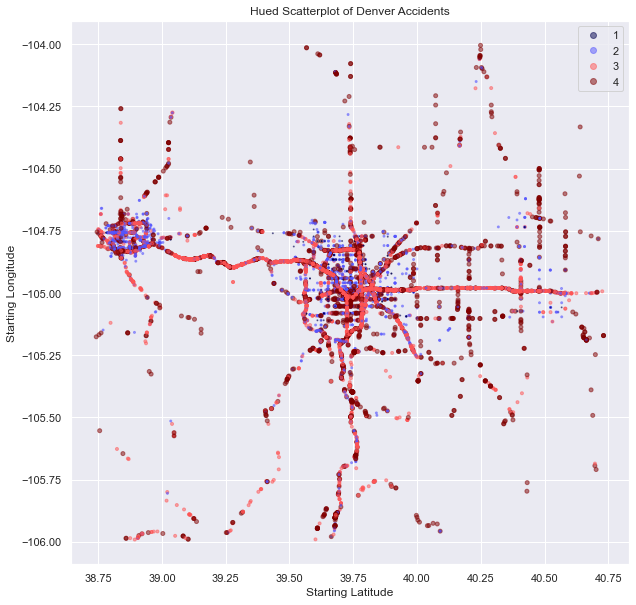

In [38]:
make_hued_scatterplot(x = dia_df['start_lat'],
                      y = dia_df['start_lng'],
                      c = dia_df['severity'],
                      s = dia_df['severity'] ** 2,
                      cmap = 'seismic',
                      alpha = 0.5)
plt.title('Hued Scatterplot of Denver Accidents');

**Exploring Time Intervals**

- For Frame of Reference

| Human-readable Time |      Seconds      |
|----------|:-------------:|
| 1 hour | 3600 seconds |
| 1 day | 86400 seconds |
| 1 week | 604800 seconds |
| 1 month (30.44 days) | 2629743 seconds |
| 1 hour (365.24 days) | 31556926 seconds |

source: https://www.epochconverter.com/

In [39]:
dia_df_time_convert = pd.to_datetime(dia_df['start_time_ep'], unit = 's')
dia_df_time_convert = pd.DataFrame(dia_df_time_convert)
dia_df_time_convert.head(3)

start_time_ep
0 2016-11-30 14:02:43
1 2016-11-30 15:09:40
2 2016-11-30 15:27:44

In [40]:
dia_df_time_convert.rename(columns = {'start_time_ep': 'start_time'}, inplace = True)

In [41]:
dia_df_time_convert = dia_df_time_convert.sort_values('start_time')
dia_df_time_convert.head()

start_time
1125 2016-06-21 08:41:51
710  2016-06-21 08:49:55
711  2016-06-21 15:11:55
712  2016-06-22 13:24:07
713  2016-06-22 13:24:07

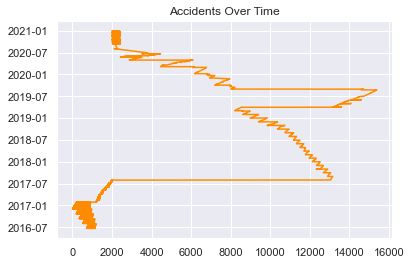

In [42]:
#https://www.python-graph-gallery.com/242-area-chart-and-faceting
plt.plot(dia_df_time_convert, color = 'darkorange')
plt.title("Accidents Over Time");

In [43]:
dia_df.columns[0:35]

Index(['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'distance(mi)', 'temperature(f)', 'wind_chill(f)', 'humidity(%)',
       'pressure(in)', 'visibility(mi)', 'wind_speed(mph)',
       'precipitation(in)', 'amenity', 'bump', 'crossing', 'give_way',
       'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop',
       'traffic_calming', 'traffic_signal', 'turning_loop', 'start_time_ep',
       'end_time_ep', 'weather_timestamp_ep', 'year', 'month', 'week',
       'accident_duration', 'side_L', 'side_R'],
      dtype='object')

In [44]:
#trying to pinpoint the 'average' accident severity and location:
mean_accident_loc = dia_df[['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng']].mean()
loc_dict = dict(mean_accident_loc)
loc_dict

{'severity': 2.7409309582629047,
 'start_lat': 39.68519548381163,
 'start_lng': -104.97389410778783,
 'end_lat': 39.68523480672235,
 'end_lng': -104.97390066720894}

**Looking At Individual Years, Months, and Days of DST**

In [45]:
dia_2016 = dia_df.loc[dia_df['year'] == 2016]
dia_2017 = dia_df.loc[dia_df['year'] == 2017]
dia_2018 = dia_df.loc[dia_df['year'] == 2018]
dia_2019 = dia_df.loc[dia_df['year'] == 2019]
dia_2020 = dia_df.loc[dia_df['year'] == 2020]

In [46]:
print(dia_2016.shape[0])
print(dia_2017.shape[0])
print(dia_2018.shape[0])
print(dia_2019.shape[0])
print(dia_2020.shape[0])

1081
1760
2913
4792
4836


In [47]:
dia_2016.head(3)

severity  start_lat   start_lng    end_lat     end_lng  distance(mi)  \
0         4  38.897000 -104.747070  38.897050 -104.747869         0.043   
1         3  39.629510 -104.904710  39.637640 -104.909150         0.609   
2         2  38.936713 -104.797781  38.938301 -104.798323         0.114   

   temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  visibility(mi)  \
0            37.9           32.7         18.0         29.94            10.0   
1            37.9           30.5         19.0         29.94            10.0   
2            37.8           31.3         16.0         29.95            10.0   

   wind_speed(mph)  precipitation(in)  amenity  bump  crossing  give_way  \
0              6.9                0.0        0     0         1         0   
1             11.5                0.0        0     0         0         0   
2              9.2                0.0        0     0         0         0   

   junction  no_exit  railway  roundabout  station  stop  traffic_calming  \
0         0        0        0           0        0     0                0   
1         0        0        0           0        0     0                0   
2         0        0        0           0        0     0                0   

   traffic_signal  turning_loop  start_time_ep   end_time_ep  \
0               0             0   1.480515e+09  1.480536e+09   
1               0             0   1.480519e+09  1.480540e+09   
2               1             0   1.480520e+09  1.480541e+09   

   weather_timestamp_ep  year  month  week  accident_duration  side_L  side_R  \
0          1.480514e+09  2016     11    48            21600.0       1       0   
1          1.480518e+09  2016     11    48            21600.0       0       1   
2          1.480518e+09  2016     11    48            21600.0       0       1   

   wind_direction_CALM  wind_direction_E  wind_direction_ENE  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   

   wind_direction_ESE  wind_direction_N  wind_direction_NE  \
0                   0                 0                  0   
1                   0                 1                  0   
2                   0                 0                  0   

   wind_direction_NNE  wind_direction_NNW  wind_direction_NW  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   0                  0   

   wind_direction_S  wind_direction_SE  wind_direction_SSE  \
0                 0                  1                   0   
1                 0                  0                   0   
2                 1                  0                   0   

   wind_direction_SSW  wind_direction_SW  wind_direction_VAR  \
0                   0                  0                   0   
1                   0                  0                   0   
2                   0                  0                   0   

   wind_direction_W  wind_direction_WNW  wind_direction_WSW  \
0                 0                   0                   0   
1                 0                   0                   0   
2                 0                   0                   0   

   weather_condition_Blowing Dust / Windy  weather_condition_Clear  \
0                                       0                        0   
1                                       0                        0   
2                                       0                        1   

   weather_condition_Cloudy  weather_condition_Fog  \
0                         0                      0   
1                         0                      0   
2                         0                      0   

   weather_condition_Haze / Windy  weather_condition_Heavy Blowing Snow  \
0                               0                                     0   
1                  

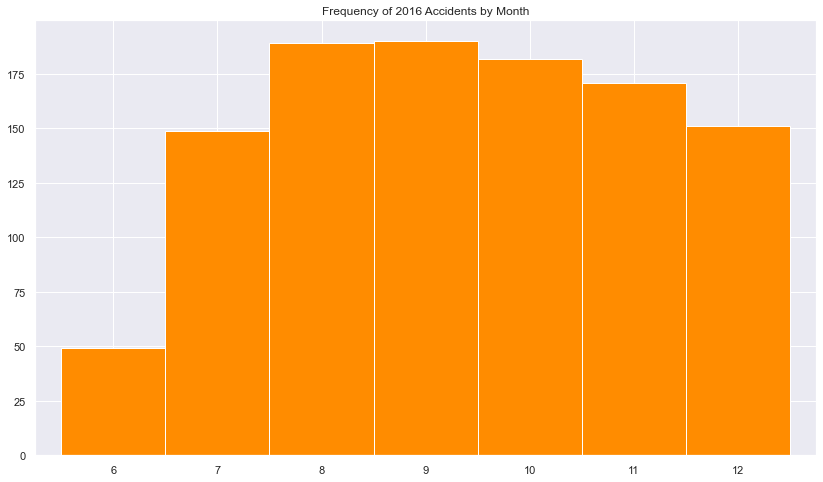

In [48]:
#bar plot of 2016 accident frequencies
dia_2016['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize = (14, 8),
                                                   width = 1,
                                                   color = 'darkorange',
                                                   title = 'Frequency of 2016 Accidents by Month',
                                                   rot = 0);

In [49]:
dia_2017.head(3)

severity  start_lat  start_lng    end_lat     end_lng  distance(mi)  \
112         2  40.338720 -104.98033  40.328236 -104.980350         0.724   
113         2  39.644803 -104.87455  39.637348 -104.889655         0.955   
114         2  39.683950 -104.94467  39.681740 -104.937560         0.408   

     temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  visibility(mi)  \
112            14.0            8.2         86.0         30.10             3.0   
113            14.0            8.2         88.0         30.24             9.0   
114            16.0           16.0         88.0         30.26             7.0   

     wind_speed(mph)  precipitation(in)  amenity  bump  crossing  give_way  \
112         3.500000                0.0        0     0         0         0   
113         3.500000                0.0        0     0         0         0   
114         9.142945                0.0        0     0         0         0   

     junction  no_exit  railway  roundabout  station  stop  traffic_calming  \
112         0        0        0           0        0     0                0   
113         0        0        0           0        0     0                0   
114         0        0        0           0        0     0                0   

     traffic_signal  turning_loop  start_time_ep   end_time_ep  \
112               0             0   1.483425e+09  1.483447e+09   
113               0             0   1.483427e+09  1.483449e+09   
114               0             0   1.483429e+09  1.483451e+09   

     weather_timestamp_ep  year  month  week  accident_duration  side_L  \
112          1.483424e+09  2017      1     1            21600.0       0   
113          1.483426e+09  2017      1     1            21600.0       0   
114          1.483430e+09  2017      1     1            21600.0       0   

     side_R  wind_direction_CALM  wind_direction_E  wind_direction_ENE  \
112       1                    0                 0                   0   
113       1                    0                 0                   0   
114       1                    1                 0                   0   

     wind_direction_ESE  wind_direction_N  wind_direction_NE  \
112                   0                 0                  0   
113                   1                 0                  0   
114                   0                 0                  0   

     wind_direction_NNE  wind_direction_NNW  wind_direction_NW  \
112                   0                   0                  0   
113                   0                   0                  0   
114                   0                   0                  0   

     wind_direction_S  wind_direction_SE  wind_direction_SSE  \
112                 1                  0                   0   
113                 0                  0                   0   
114                 0                  0                   0   

     wind_direction_SSW  wind_direction_SW  wind_direction_VAR  \
112                   0                  0                   0   
113                   0                  0                   0   
114                   0                  0                   0   

     wind_direction_W  wind_direction_WNW  wind_direction_WSW  \
112                 0                   0                   0   
113                 0                   0                   0   
114                 0                   0                   0   

     weather_condition_Blowing Dust / Windy  weather_condition_Clear  \
112                                       0                        0   
113                                       0                        0   
114                                       0                        0   

     weather_condition_Cloudy  weather_condition_Fog  \
112                         1                      0   
113                         0                      0   
114                         0                      0   

     weather_condition_Haze / Windy  weather_condition_Heavy Bl

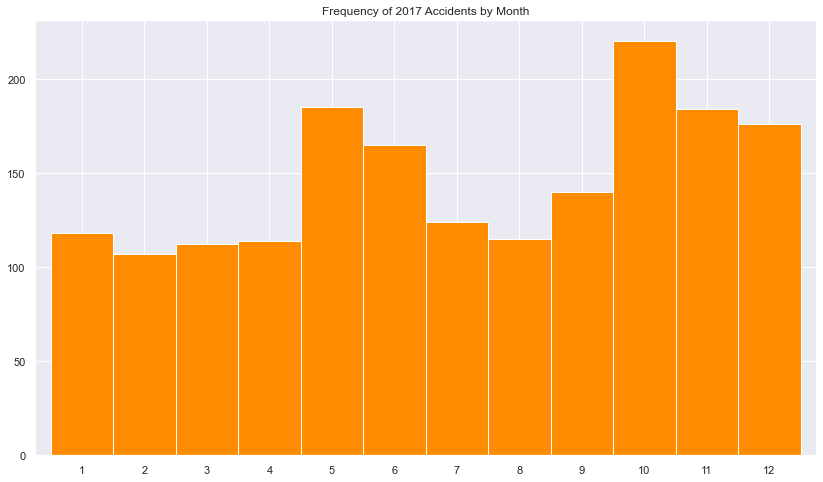

In [50]:
#bar plot of 2017 accident frequencies
dia_2017['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize = (14, 8),
                                                   width = 1,
                                                   color = 'darkorange',
                                                   title = 'Frequency of 2017 Accidents by Month',
                                                   rot = 0);

In [51]:
dia_2018.head(3)

severity  start_lat  start_lng    end_lat     end_lng  distance(mi)  \
9402         3   38.92103 -104.81474  38.919293 -104.815059         0.121   
9403         4   39.90011 -105.02500  39.914110 -105.025040         0.967   
9404         4   39.91411 -105.02504  39.900110 -105.025000         0.967   

      temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  \
9402            25.3           21.1         77.0         29.66   
9403            30.2           20.8        100.0         29.61   
9404            30.2           20.8        100.0         29.61   

      visibility(mi)  wind_speed(mph)  precipitation(in)  amenity  bump  \
9402            10.0              3.5                0.0        0     0   
9403             0.2             11.5                0.0        0     0   
9404             0.2             11.5                0.0        0     0   

      crossing  give_way  junction  no_exit  railway  roundabout  station  \
9402         0         0         0        0        0           0        0   
9403         0         0         0        0        0           0        0   
9404         1         0         0        0        0           0        0   

      stop  traffic_calming  traffic_signal  turning_loop  start_time_ep  \
9402     0                0               0             0   1.543560e+09   
9403     0                0               0             0   1.543563e+09   
9404     0                0               1             0   1.543563e+09   

       end_time_ep  weather_timestamp_ep  year  month  week  \
9402  1.543562e+09          1.543561e+09  2018     11    47   
9403  1.543565e+09          1.543564e+09  2018     11    47   
9404  1.543565e+09          1.543564e+09  2018     11    47   

      accident_duration  side_L  side_R  wind_direction_CALM  \
9402             1788.0       0       1                    0   
9403             1792.0       0       1                    0   
9404             1792.0       0       1                    0   

      wind_direction_E  wind_direction_ENE  wind_direction_ESE  \
9402                 0                   0                   0   
9403                 0                   0                   0   
9404                 0                   0                   0   

      wind_direction_N  wind_direction_NE  wind_direction_NNE  \
9402                 0                  0                   1   
9403                 0                  0                   0   
9404                 0                  0                   0   

      wind_direction_NNW  wind_direction_NW  wind_direction_S  \
9402                   0                  0                 0   
9403                   1                  0                 0   
9404                   1                  0                 0   

      wind_direction_SE  wind_direction_SSE  wind_direction_SSW  \
9402                  0                   0                   0   
9403                  0                   0                   0   
9404                  0                   0                   0   

      wind_direction_SW  wind_direction_VAR  wind_direction_W  \
9402                  0                   0                 0   
9403                  0                   0                 0   
9404                  0                   0                 0   

      wind_direction_WNW  wind_direction_WSW  \
9402                   0                   0   
9403                   0                   0   
9404                   0                   0   

      weather_condition_Blowing Dust / Windy  weather_condition_Clear  \
9402                                       0                        1   
9403                                       0                        0   
9404                                       0                        0   

      weather_condition_Cloudy  weather_condition_Fog  \
9402                         0                      0   
9403                         0                      1   
9404                         0   

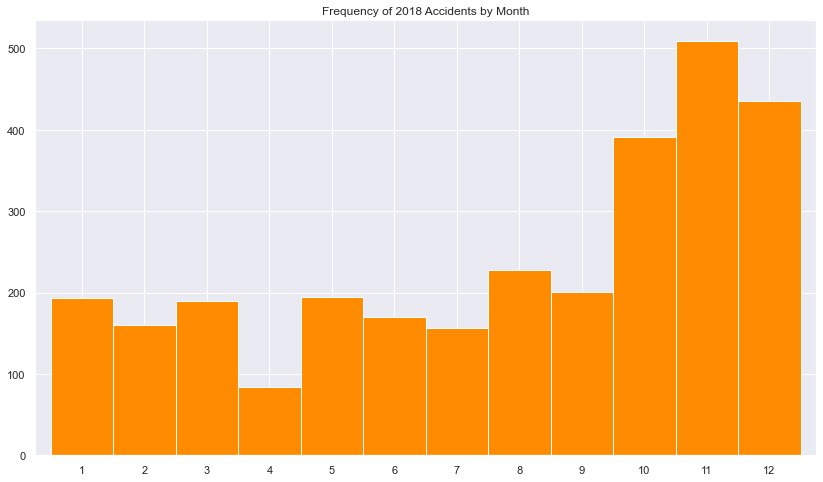

In [52]:
#bar plot of 2018 accident frequencies
dia_2018['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize = (14, 8),
                                                   width = 1,
                                                   color = 'darkorange',
                                                   title = 'Frequency of 2018 Accidents by Month',
                                                   rot = 0);

In [53]:
dia_2019.head(3)

severity  start_lat  start_lng   end_lat    end_lng  distance(mi)  \
6838         3   39.73597 -105.01440  39.73597 -105.01440          0.00   
6839         2   39.78395 -105.02839  39.78394 -105.02218          0.33   
6840         3   39.71259 -105.30360  39.71259 -105.30360          0.00   

      temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  \
6838            50.0           50.0         16.0         24.38   
6839            45.0           42.0         23.0         24.35   
6840            54.0           54.0         21.0         24.33   

      visibility(mi)  wind_speed(mph)  precipitation(in)  amenity  bump  \
6838            10.0              3.0                0.0        0     0   
6839            10.0              5.0                0.0        0     0   
6840            30.0              0.0                0.0        0     0   

      crossing  give_way  junction  no_exit  railway  roundabout  station  \
6838         0         0         0        0        0           0        0   
6839         0         0         1        0        0           0        0   
6840         0         0         0        0        0           0        0   

      stop  traffic_calming  traffic_signal  turning_loop  start_time_ep  \
6838     0                0               0             0   1.577056e+09   
6839     0                0               0             0   1.577080e+09   
6840     0                0               0             0   1.577098e+09   

       end_time_ep  weather_timestamp_ep  year  month  week  \
6838  1.577058e+09          1.577056e+09  2019     12    51   
6839  1.577081e+09          1.577080e+09  2019     12    51   
6840  1.577100e+09          1.577098e+09  2019     12    51   

      accident_duration  side_L  side_R  wind_direction_CALM  \
6838             1760.0       0       1                    0   
6839             1788.0       0       1                    0   
6840             1759.0       0       1                    1   

      wind_direction_E  wind_direction_ENE  wind_direction_ESE  \
6838                 0                   1                   0   
6839                 0                   0                   0   
6840                 0                   0                   0   

      wind_direction_N  wind_direction_NE  wind_direction_NNE  \
6838                 0                  0                   0   
6839                 0                  0                   0   
6840                 0                  0                   0   

      wind_direction_NNW  wind_direction_NW  wind_direction_S  \
6838                   0                  0                 0   
6839                   0                  0                 0   
6840                   0                  0                 0   

      wind_direction_SE  wind_direction_SSE  wind_direction_SSW  \
6838                  0                   0                   0   
6839                  0                   0                   0   
6840                  0                   0                   0   

      wind_direction_SW  wind_direction_VAR  wind_direction_W  \
6838                  0                   0                 0   
6839                  0                   0                 0   
6840                  0                   0                 0   

      wind_direction_WNW  wind_direction_WSW  \
6838                   0                   0   
6839                   0                   1   
6840                   0                   0   

      weather_condition_Blowing Dust / Windy  weather_condition_Clear  \
6838                                       0                        1   
6839                                       0                        0   
6840                                       0                        0   

      weather_condition_Cloudy  weather_condition_Fog  \
6838                         0                      0   
6839                         1                      0   
6840                         1           

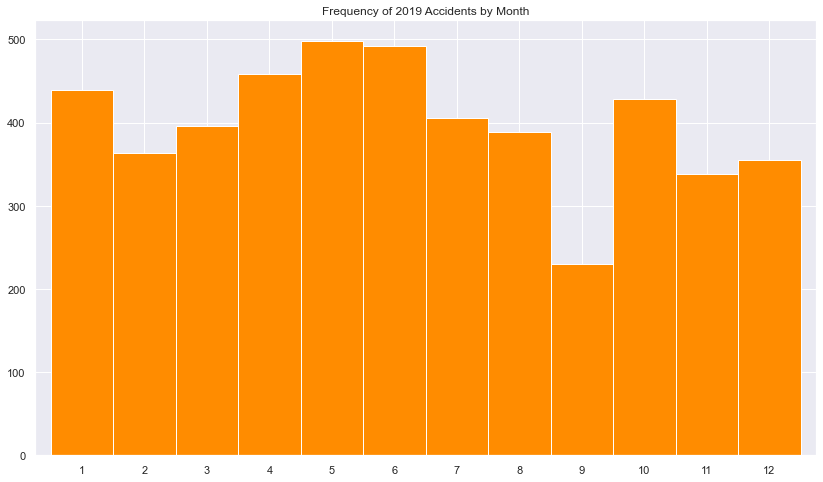

In [54]:
#bar plot of 2019 accident frequencies
dia_2019['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize = (14, 8),
                                                   width = 1,
                                                   color = 'darkorange',
                                                   title = 'Frequency of 2019 Accidents by Month', 
                                                   rot = 0);

In [55]:
dia_2020.head(3)

severity  start_lat   start_lng    end_lat     end_lng  distance(mi)  \
2002         2  39.736776 -105.162938  39.784091 -105.120981         3.956   
2003         2  39.677272 -105.939608  39.678821 -105.925059         0.781   
2004         2  39.736776 -105.162938  39.754544 -105.145185         1.548   

      temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  \
2002            43.0           37.0         53.0         24.56   
2003            41.0           36.0         35.0         20.84   
2004            48.0           48.0         15.0         24.36   

      visibility(mi)  wind_speed(mph)  precipitation(in)  amenity  bump  \
2002            10.0             12.0                0.0        0     0   
2003            10.0              8.0                0.0        0     0   
2004            20.0              0.0                0.0        0     0   

      crossing  give_way  junction  no_exit  railway  roundabout  station  \
2002         0         0         0        0        0           0        0   
2003         0         0         1        0        0           0        0   
2004         0         0         0        0        0           0        0   

      stop  traffic_calming  traffic_signal  turning_loop  start_time_ep  \
2002     0                0               0             0   1.605827e+09   
2003     0                0               0             0   1.602993e+09   
2004     0                0               0             0   1.607548e+09   

       end_time_ep  weather_timestamp_ep  year  month  week  \
2002  1.605840e+09          1.605826e+09  2020     11    46   
2003  1.602998e+09          1.602993e+09  2020     10    42   
2004  1.607555e+09          1.607547e+09  2020     12    49   

      accident_duration  side_L  side_R  wind_direction_CALM  \
2002            13137.0       0       1                    0   
2003             5010.0       0       1                    0   
2004             6774.0       0       1                    1   

      wind_direction_E  wind_direction_ENE  wind_direction_ESE  \
2002                 0                   0                   0   
2003                 0                   0                   0   
2004                 0                   0                   0   

      wind_direction_N  wind_direction_NE  wind_direction_NNE  \
2002                 0                  0                   0   
2003                 1                  0                   0   
2004                 0                  0                   0   

      wind_direction_NNW  wind_direction_NW  wind_direction_S  \
2002                   0                  0                 0   
2003                   0                  0                 0   
2004                   0                  0                 0   

      wind_direction_SE  wind_direction_SSE  wind_direction_SSW  \
2002                  0                   1                   0   
2003                  0                   0                   0   
2004                  0                   0                   0   

      wind_direction_SW  wind_direction_VAR  wind_direction_W  \
2002                  0                   0                 0   
2003                  0                   0                 0   
2004                  0                   0                 0   

      wind_direction_WNW  wind_direction_WSW  \
2002                   0                   0   
2003                   0                   0   
2004                   0                   0   

      weather_condition_Blowing Dust / Windy  weather_condition_Clear  \
2002                                       0                        1   
2003                                       0                        1   
2004                                       0                        0   

      weather_condition_Cloudy  weather_condition_Fog  \
2002                         0                      0   
2003                         0                      0   
2004                         

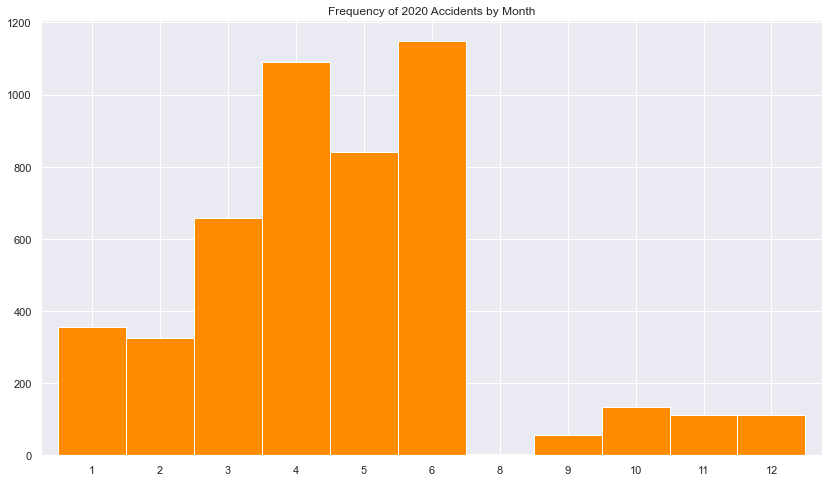

In [56]:
#bar plot of 2020 accident frequencies
dia_2020['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize = (14, 8),
                                                   width = 1,
                                                   color = 'darkorange',
                                                   title = 'Frequency of 2020 Accidents by Month',
                                                   rot = 0);

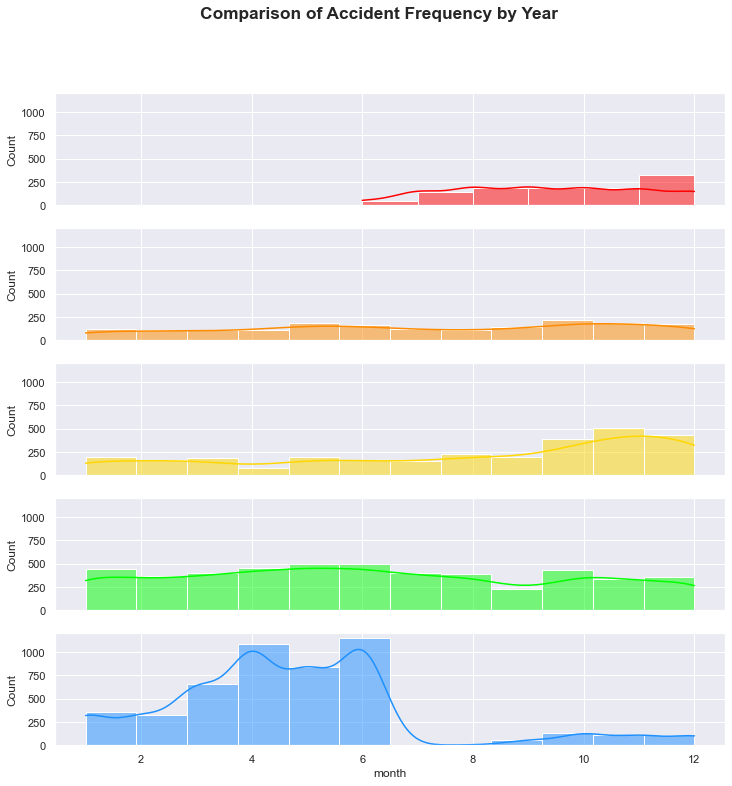

In [57]:
#setting up subplots and figsize:
fig, axs = plt.subplots(5, 1, sharex = True, sharey = True, figsize=(12, 12))

#setting title for 'overall' plot
fig.suptitle('Comparison of Accident Frequency by Year',
               fontsize = 'x-large', 
               fontweight = 'bold' )

#individual subplots:
sns.histplot(data=dia_2016, x="month", color="red", bins = 6, kde=True, ax=axs[0])
sns.histplot(data=dia_2017, x="month", color="darkorange", bins = 12, kde=True, ax=axs[1])
sns.histplot(data=dia_2018, x="month", color="gold", bins = 12, kde=True, ax=axs[2])
sns.histplot(data=dia_2019, x="month", color="lime", bins = 12, kde=True, ax=axs[3])
sns.histplot(data=dia_2020, x="month", color="dodgerblue", bins = 12, kde=True, ax=axs[4])

#displaying plot:
plt.show()

In [58]:
#the earliest available dates are in June 2016

dia_2016_11 = dia_2016.loc[dia_2016['month'] == 11]
dia_2016_11.head(3)

severity  start_lat   start_lng    end_lat     end_lng  distance(mi)  \
0         4  38.897000 -104.747070  38.897050 -104.747869         0.043   
1         3  39.629510 -104.904710  39.637640 -104.909150         0.609   
2         2  38.936713 -104.797781  38.938301 -104.798323         0.114   

   temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  visibility(mi)  \
0            37.9           32.7         18.0         29.94            10.0   
1            37.9           30.5         19.0         29.94            10.0   
2            37.8           31.3         16.0         29.95            10.0   

   wind_speed(mph)  precipitation(in)  amenity  bump  crossing  give_way  \
0              6.9                0.0        0     0         1         0   
1             11.5                0.0        0     0         0         0   
2              9.2                0.0        0     0         0         0   

   junction  no_exit  railway  roundabout  station  stop  traffic_calming  \
0         0        0        0           0        0     0                0   
1         0        0        0           0        0     0                0   
2         0        0        0           0        0     0                0   

   traffic_signal  turning_loop  start_time_ep   end_time_ep  \
0               0             0   1.480515e+09  1.480536e+09   
1               0             0   1.480519e+09  1.480540e+09   
2               1             0   1.480520e+09  1.480541e+09   

   weather_timestamp_ep  year  month  week  accident_duration  side_L  side_R  \
0          1.480514e+09  2016     11    48            21600.0       1       0   
1          1.480518e+09  2016     11    48            21600.0       0       1   
2          1.480518e+09  2016     11    48            21600.0       0       1   

   wind_direction_CALM  wind_direction_E  wind_direction_ENE  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   

   wind_direction_ESE  wind_direction_N  wind_direction_NE  \
0                   0                 0                  0   
1                   0                 1                  0   
2                   0                 0                  0   

   wind_direction_NNE  wind_direction_NNW  wind_direction_NW  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   0                  0   

   wind_direction_S  wind_direction_SE  wind_direction_SSE  \
0                 0                  1                   0   
1                 0                  0                   0   
2                 1                  0                   0   

   wind_direction_SSW  wind_direction_SW  wind_direction_VAR  \
0                   0                  0                   0   
1                   0                  0                   0   
2                   0                  0                   0   

   wind_direction_W  wind_direction_WNW  wind_direction_WSW  \
0                 0                   0                   0   
1                 0                   0                   0   
2                 0                   0                   0   

   weather_condition_Blowing Dust / Windy  weather_condition_Clear  \
0                                       0                        0   
1                                       0                        0   
2                                       0                        1   

   weather_condition_Cloudy  weather_condition_Fog  \
0                         0                      0   
1                         0                      0   
2                         0                      0   

   weather_condition_Haze / Windy  weather_condition_Heavy Blowing Snow  \
0                               0                                     0   
1                  

In [59]:
dia_2017_03 = dia_2017.loc[dia_2017['month'] == 3]
#dia_2017_03.head(3)

dia_2017_11 = dia_2017.loc[dia_2017['month'] == 11]
#dia_2017_11.head(3)

In [60]:
dia_2018_03 = dia_2018.loc[dia_2018['month'] == 3]
#dia_2018_03.head(3)

dia_2018_11 = dia_2018.loc[dia_2018['month'] == 11]
#dia_2018_11.head(3)

In [61]:
dia_2019_03 = dia_2019.loc[dia_2019['month'] == 3]
#dia_2019_03.head(3)

dia_2019_11 = dia_2019.loc[dia_2019['month'] == 11]
#dia_2019_11.head(3)

In [62]:
dia_2020_03 = dia_2020.loc[dia_2020['month'] == 3]
#dia_2020_03.head(3)

dia_2020_11 = dia_2020.loc[dia_2020['month'] == 11]
#dia_2020_11.head(3)

**Feature Engineering**

In [63]:
#making a function to apply to the df to make a new 'label' column
#1 if the accident took place during the week after DST
#0 if the accident took place during any other time of year

#https://stackoverflow.com/questions/59642338/creating-new-column-based-on-condition-on-other-column-in-pandas-dataframe
#https://stackoverflow.com/questions/13628791/determine-whether-integer-is-between-two-other-integers

def is_DST_week(epoch_time):
    if 1478390400 <= epoch_time <= (1478390400 + 604800): 
        return 1
    elif 1489276800 <= epoch_time <= (1489276800 + 604800):
        return 1
    elif 1509840000 <= epoch_time <= (1509840000 + 604800): 
        return 1
    elif 1520726400 <= epoch_time <= (1520726400 + 604800):
        return 1
    elif 1541289600 <= epoch_time <= (1541289600 + 604800):
        return 1
    elif 1552176000 <= epoch_time <= (1552176000 + 604800):
        return 1
    elif 1572739200 <= epoch_time <= (1572739200 + 604800):
        return 1
    elif 1583625600 <= epoch_time <= (1583625600 + 604800):
        return 1
    elif 1604275200 <= epoch_time <= (1604275200 + 604800):
        return 1
    else:
        return 0

dia_df["is_DST"] = dia_df["start_time_ep"].apply(lambda epoch_time: is_DST_week(epoch_time))

In [64]:
#confirming new column generated
dia_df.head(3)

severity  start_lat   start_lng    end_lat     end_lng  distance(mi)  \
0         4  38.897000 -104.747070  38.897050 -104.747869         0.043   
1         3  39.629510 -104.904710  39.637640 -104.909150         0.609   
2         2  38.936713 -104.797781  38.938301 -104.798323         0.114   

   temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  visibility(mi)  \
0            37.9           32.7         18.0         29.94            10.0   
1            37.9           30.5         19.0         29.94            10.0   
2            37.8           31.3         16.0         29.95            10.0   

   wind_speed(mph)  precipitation(in)  amenity  bump  crossing  give_way  \
0              6.9                0.0        0     0         1         0   
1             11.5                0.0        0     0         0         0   
2              9.2                0.0        0     0         0         0   

   junction  no_exit  railway  roundabout  station  stop  traffic_calming  \
0         0        0        0           0        0     0                0   
1         0        0        0           0        0     0                0   
2         0        0        0           0        0     0                0   

   traffic_signal  turning_loop  start_time_ep   end_time_ep  \
0               0             0   1.480515e+09  1.480536e+09   
1               0             0   1.480519e+09  1.480540e+09   
2               1             0   1.480520e+09  1.480541e+09   

   weather_timestamp_ep  year  month  week  accident_duration  side_L  side_R  \
0          1.480514e+09  2016     11    48            21600.0       1       0   
1          1.480518e+09  2016     11    48            21600.0       0       1   
2          1.480518e+09  2016     11    48            21600.0       0       1   

   wind_direction_CALM  wind_direction_E  wind_direction_ENE  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   

   wind_direction_ESE  wind_direction_N  wind_direction_NE  \
0                   0                 0                  0   
1                   0                 1                  0   
2                   0                 0                  0   

   wind_direction_NNE  wind_direction_NNW  wind_direction_NW  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   0                  0   

   wind_direction_S  wind_direction_SE  wind_direction_SSE  \
0                 0                  1                   0   
1                 0                  0                   0   
2                 1                  0                   0   

   wind_direction_SSW  wind_direction_SW  wind_direction_VAR  \
0                   0                  0                   0   
1                   0                  0                   0   
2                   0                  0                   0   

   wind_direction_W  wind_direction_WNW  wind_direction_WSW  \
0                 0                   0                   0   
1                 0                   0                   0   
2                 0                   0                   0   

   weather_condition_Blowing Dust / Windy  weather_condition_Clear  \
0                                       0                        0   
1                                       0                        0   
2                                       0                        1   

   weather_condition_Cloudy  weather_condition_Fog  \
0                         0                      0   
1                         0                      0   
2                         0                      0   

   weather_condition_Haze / Windy  weather_condition_Heavy Blowing Snow  \
0                               0                                     0   
1                  

In [65]:
dia_df['is_DST'].value_counts(normalize = True)

0    0.962359
1    0.037641
Name: is_DST, dtype: float64

In [66]:
dia_df.to_csv('../data/dia_df_cleaned.csv', index=False)